# Unsupervised Learning with K-Means Clustering

Objective:
The objective of this assignment is to help you understand and apply the principles of unsupervised learning using the K-Means clustering algorithm. You will work with the Iris dataset to perform clustering and evaluate the results.

Data Exploration & Pre processing

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000  

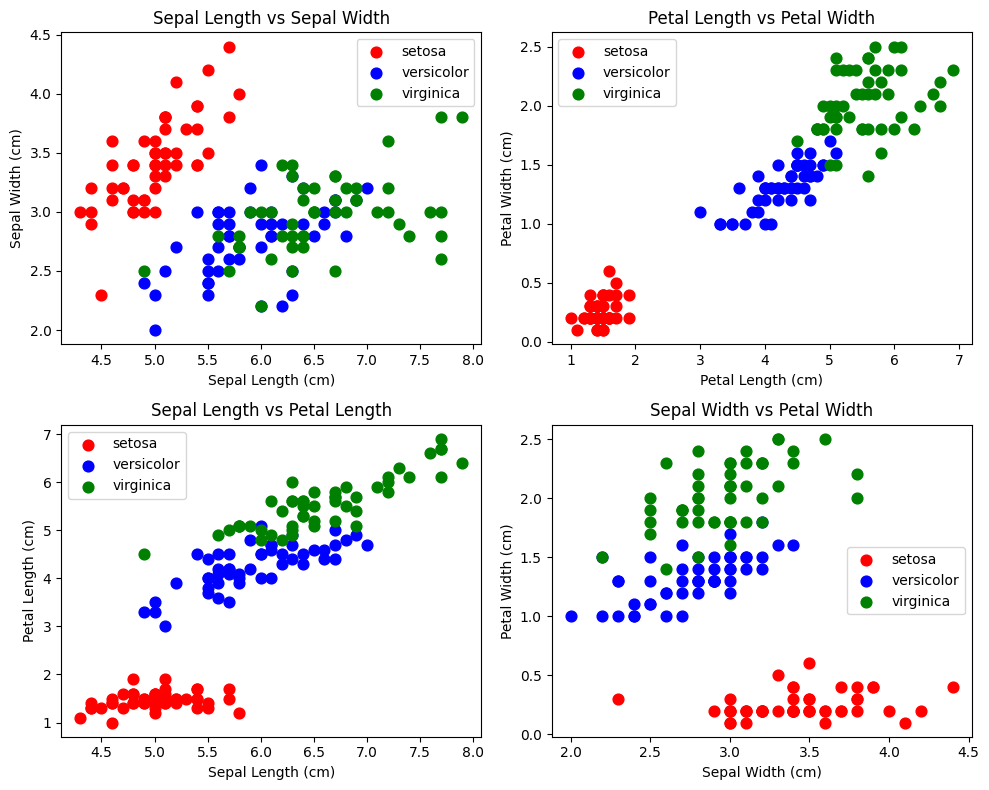

In [22]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame for better exploration
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Add species labels (0, 1, 2)
iris_df['species_name'] = iris_df['species'].apply(lambda x: iris.target_names[x])  # Map species to names

# Display basic information
print(iris_df.head())
print(iris_df.describe())
print("\nUnique Species:", iris.target_names)

# Define species colors for the plot
species_colors = {
    0: 'red',     # Setosa
    1: 'blue',    # Versicolor
    2: 'green'    # Virginica
}

# Plot: Sepal Length vs Sepal Width
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
for species, color in species_colors.items():
    plt.scatter(
        iris_df[iris_df['species'] == species]['sepal length (cm)'],
        iris_df[iris_df['species'] == species]['sepal width (cm)'],
        label=iris.target_names[species],
        color=color,
        s=60
    )
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()

# Plot: Petal Length vs Petal Width
plt.subplot(2, 2, 2)
for species, color in species_colors.items():
    plt.scatter(
        iris_df[iris_df['species'] == species]['petal length (cm)'],
        iris_df[iris_df['species'] == species]['petal width (cm)'],
        label=iris.target_names[species],
        color=color,
        s=60
    )
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()

# Plot: Sepal Length vs Petal Length
plt.subplot(2, 2, 3)
for species, color in species_colors.items():
    plt.scatter(
        iris_df[iris_df['species'] == species]['sepal length (cm)'],
        iris_df[iris_df['species'] == species]['petal length (cm)'],
        label=iris.target_names[species],
        color=color,
        s=60
    )
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length')
plt.legend()

# Plot: Sepal Width vs Petal Width
plt.subplot(2, 2, 4)
for species, color in species_colors.items():
    plt.scatter(
        iris_df[iris_df['species'] == species]['sepal width (cm)'],
        iris_df[iris_df['species'] == species]['petal width (cm)'],
        label=iris.target_names[species],
        color=color,
        s=60
    )
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Sepal Width vs Petal Width')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


K -means clustering algo

Apply K-Means Clustering

Apply the K-Means clustering algorithm to the dataset.
Determine the optimal number of clusters using the Elbow method.

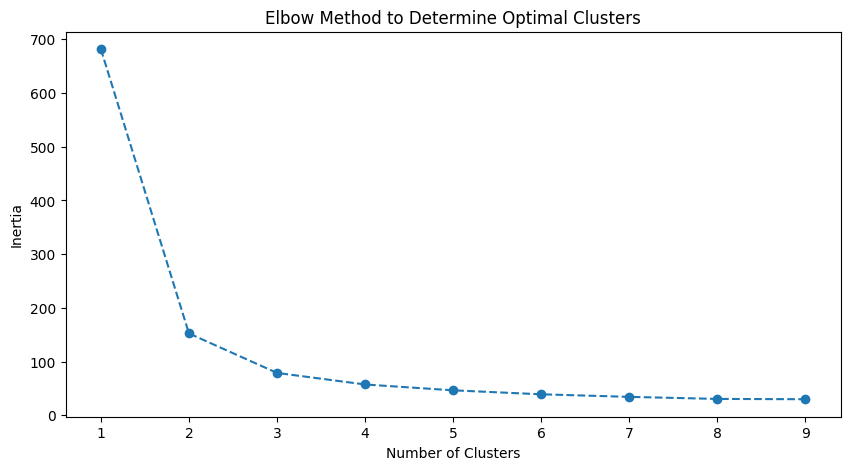

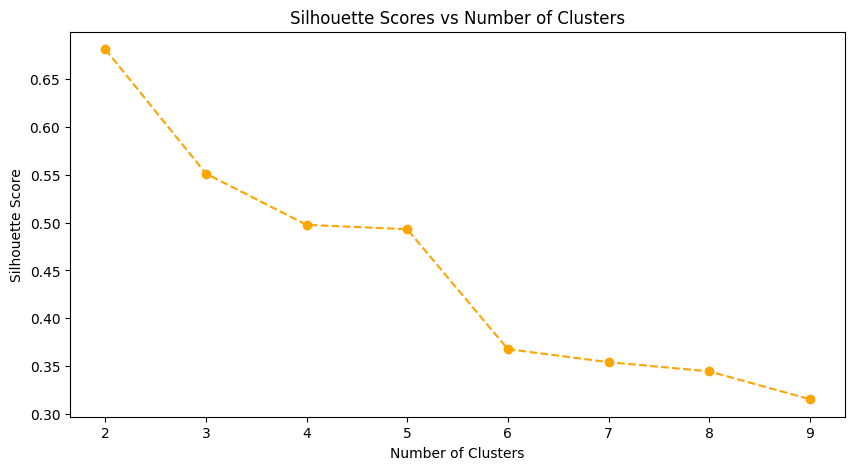

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Features (X) only, excluding labels
X = iris.data

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    if k > 1:  # Silhouette score is undefined for k=1
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()

# Plot silhouette scores for better understanding
if silhouette_scores:
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--', color='orange')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores vs Number of Clusters')
    plt.show()

# Choose optimal number of clusters (e.g., k=3 for Iris dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
iris_df['cluster'] = kmeans.labels_


Use PCA (Principal Component Analysis) to reduce the data to 2D for visualization.
Visualize the clusters formed by K-Means and compare them with the true labels.

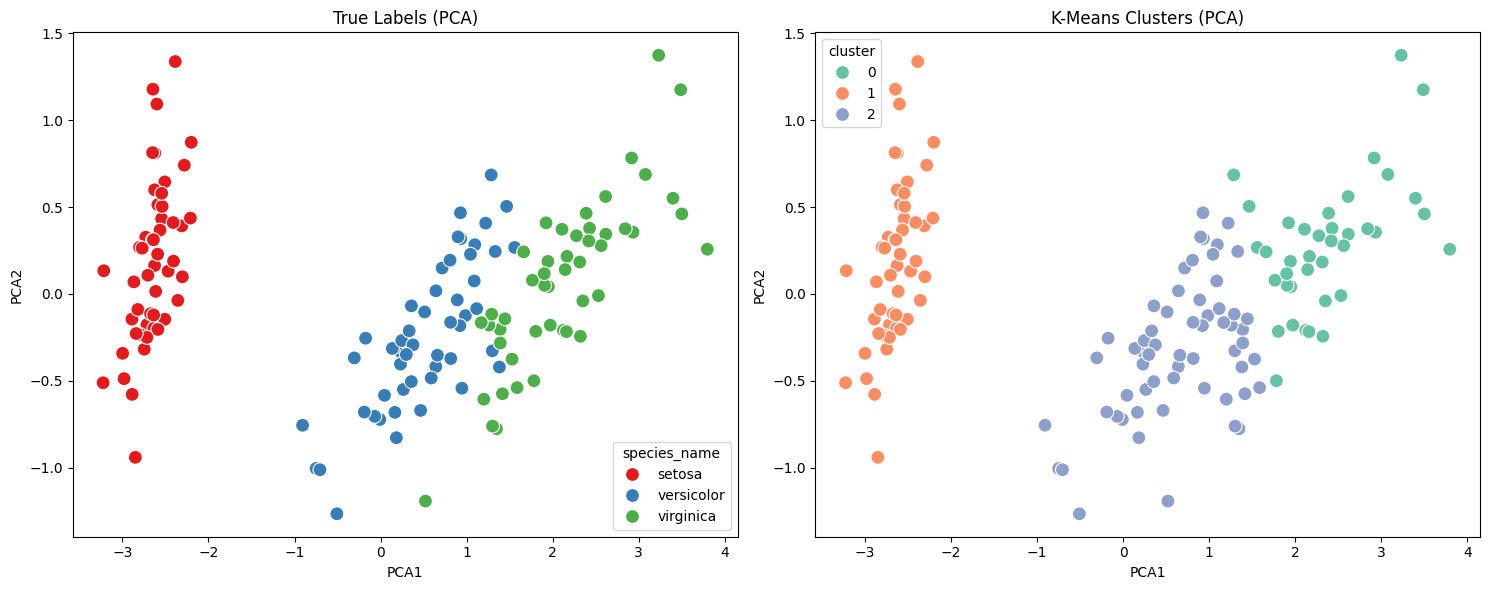

In [24]:
from sklearn.decomposition import PCA

# Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add PCA components to DataFrame
iris_df['PCA1'] = X_pca[:, 0]
iris_df['PCA2'] = X_pca[:, 1]

# Plot true labels vs cluster labels
plt.figure(figsize=(15, 6))

# True labels
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='species_name', data=iris_df, palette='Set1', s=100)
plt.title('True Labels (PCA)')

# Cluster labels
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=iris_df, palette='Set2', s=100)
plt.title('K-Means Clusters (PCA)')

plt.tight_layout()
plt.show()


Create a confusion matrix to compare the cluster labels with the true labels.
Discuss the clustering performance and the confusion matrix results.

Code for Confusion Matrix and Evaluation:

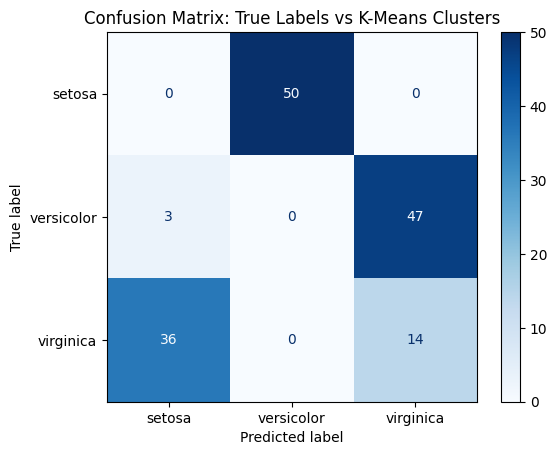

Cluster Centers (Means of each cluster for each feature):
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix comparing clusters with true labels
conf_matrix = confusion_matrix(iris_df['species'], iris_df['cluster'])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=iris.target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: True Labels vs K-Means Clusters')
plt.show()




Using K-means clustering , the heatmap shows the prediction has not identified correctly. Ideally , in the heatmap the top-left to right-bottom values should have the max value . That would mean that the true value of Setosa was getting predicted as Setosa and so on and so forth. But, here the values are not coming correct. Hence , this may not be the ideal algorithm for this scenario.